source: from https://networkrepository.com/insecta-ant-colony1-day09.php

@inproceedings{nr,
     title={The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle={AAAI},
     url={https://networkrepository.com},
     year={2015}
}

In [25]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

In [26]:
file_path = "/content/insecta-ant-colony1-day09.edges"
columns = ['Node1', 'Node2', 'Weight']  # Specify column names
df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)

<ipython-input-26-8cb090dd3b5c>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)


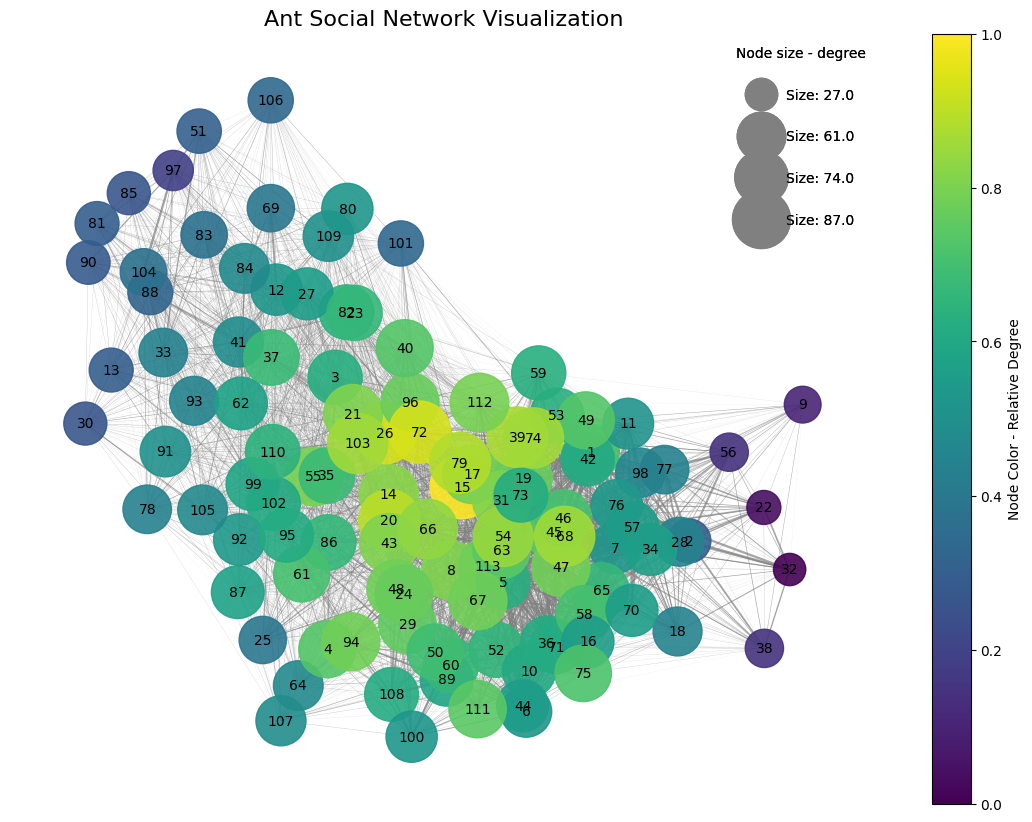

In [27]:
# Create a graph object
G = nx.Graph()


# Add edges and weights from the DataFrame
for _, row in df.iterrows():
    G.add_edge(row['Node1'], row['Node2'], weight=row['Weight'])

# Calculate node degrees (number of connections per node)
node_degrees = dict(G.degree())
max_degree = max(node_degrees.values())

# Map variables:
# Node colors based on degree
node_colors = [node_degrees[node] / max_degree for node in G.nodes]
# Node sizes proportional to degree
node_sizes = [node_degrees[node] * 20 for node in G.nodes]
# Edge widths proportional to weight
edge_widths = [G[u][v]['weight'] / max(df['Weight']) * 5 for u, v in G.edges]

# Plot the network
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)  # Fix seed for consistent layout

# Draw nodes
nodes = nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=node_sizes,
    cmap=plt.cm.viridis,
    alpha=0.9
)

# Draw edges
nx.draw_networkx_edges(
    G, pos,
    width=edge_widths,
    edge_color="gray",
    alpha=0.7
)

# Add labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Title and axis off
plt.title("Ant Social Network Visualization", fontsize=16)
plt.axis("off")

# Add legends
ax = plt.gca()

# Node size legend
unique_sizes = sorted(set(node_sizes))
for size in unique_sizes[::max(len(unique_sizes) // 4, 1)]:
    ax.plot([], [], "o", color="gray", markersize=np.sqrt(size), label=f"Size: {size/20:.1f}")

first_legend = ax.legend(
    labelspacing=2, title="Node size - degree", frameon=False, ncol=1, loc="upper right"
)
ax.add_artist(first_legend)

# Add colorbar for node colors
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Node Color - Relative Degree")

# Show plot
plt.show()
